In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Part 1

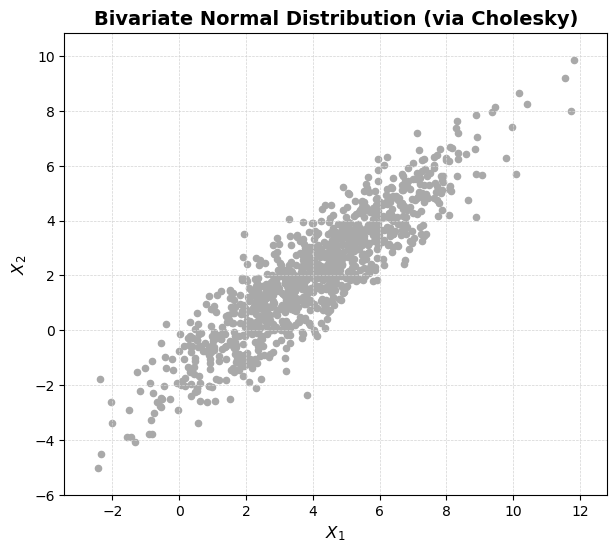

In [2]:
# slide 8 example - bivariate normal distribution
n = 1000
mu = np.array([4, 2])  # mean vector
Sigma = np.array([[1, 2],
                  [2, 9]])  # covariance matrix

# Cholesky decomposition
A = np.linalg.cholesky(Sigma).T

# simulate bivariate normal
X = np.zeros((2, n))
for i in range(n):
    Z = np.random.randn(2)  # standard normal vector
    X[:, i] = A @ Z + mu
x1 = X[0, :]
x2 = X[1, :]

# plot
plt.figure(figsize=(7, 6))
plt.scatter(x1, x2, color='darkgray', s=20)  # cex ~ size in matplotlib
plt.xlabel(r'$X_1$', fontsize=12)
plt.ylabel(r'$X_2$', fontsize=12)
plt.title("Bivariate Normal Distribution (via Cholesky)", fontsize=14, fontweight='bold')
plt.xlim([x1.min()-1, x1.max()+1])
plt.ylim([x2.min()-1, x2.max()+1])
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.show()

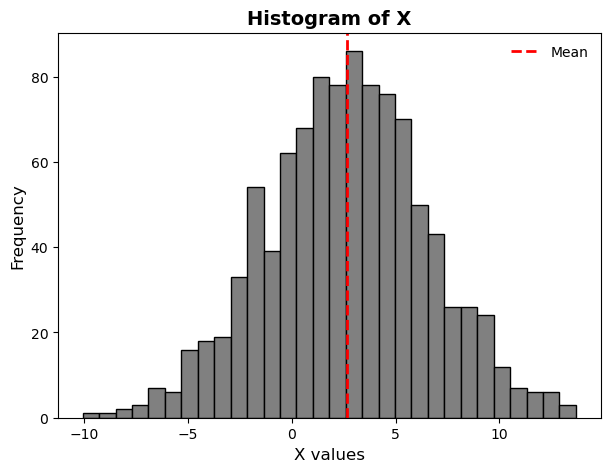

In [3]:
# slide 11 - algorithm 3 code
n = 1000
lambda_ = 1
mu_zero = 5
alpha = 2
sigma = np.random.exponential(scale=1/lambda_)
mu = np.random.normal(loc=mu_zero, scale=sigma*alpha)
X = np.random.normal(loc=mu, scale=sigma, size=n)

# plot
plt.figure(figsize=(7,5))
plt.hist(X, bins=30, color='grey', edgecolor='black')
plt.xlabel("X values", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram of X", fontsize=14, fontweight='bold')
plt.axvline(np.mean(X), color='red', linestyle='--', linewidth=2)
plt.legend(["Mean"], loc='upper right', frameon=False)
plt.show()

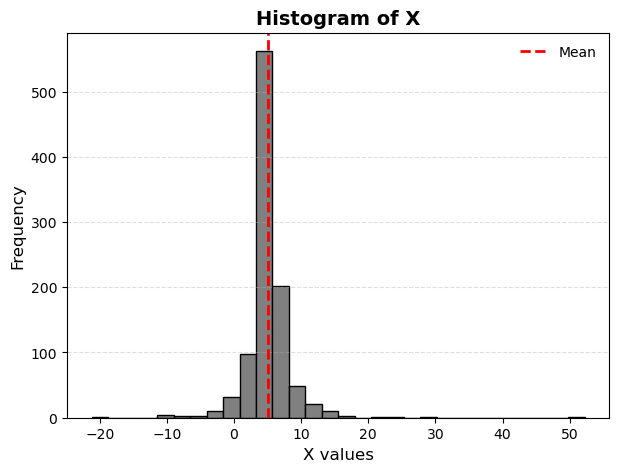

In [4]:
# slide 12 - algorithm 4 code
n = 1000
lambda_ = 1
mu_zero = 5
alpha = 2

sigma = np.random.exponential(scale=1/lambda_, size=n)
mu = np.random.normal(loc=mu_zero, scale=sigma*alpha)
X = np.random.normal(loc=mu, scale=sigma)

# plot
plt.figure(figsize=(7, 5))
plt.hist(X, bins=30, color='grey', edgecolor='black')
plt.xlabel("X values", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram of X", fontsize=14, fontweight='bold')
plt.axvline(np.mean(X), color='red', linewidth=2, linestyle='--', label='Mean')
plt.legend(loc='upper right', frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

### Comparison of Two Simulation Methods

The first method (slide 11 / Algorithm 3) generates a single `sigma` and a single `mu`, then produces all `n` observations from a normal distribution with these fixed parameters. This means that all data points share the same mean and standard deviation, resulting in a histogram that resembles a classic bell-shaped Gaussian curve. The slight randomness comes only from the initial draw of `mu` and `sigma`, so the overall spread and shape remain consistent across simulations. This approach is suitable when modeling a single population or cluster, where each observation is expected to follow the same underlying distribution.  

In contrast, the second method (slide 12 / Algorithm 4) generates a unique `sigma` and `mu` for each observation, effectively creating a mixture of `n` Gaussian distributions. Each data point comes from a slightly different normal distribution, leading to a histogram that is broader, more irregular, and sometimes skewed. This hierarchical or mixture structure produces heavier tails and greater variability than the single-cluster method. It reflects scenarios where each observation can have its own latent parameters, which is common in Bayesian hierarchical modeling or when modeling populations with inherent heterogeneity.  

The difference in histogram appearance illustrates the conceptual distinction between the two approaches. Method 1 produces smooth, narrow, and symmetric distributions, making it appropriate for single-cluster simulations or when all observations share the same underlying parameters. Method 2 produces wider, mixture-like distributions that capture the variability of individual observations, making it suitable for hierarchical modeling, uncertainty propagation, or simulating populations with variable characteristics. Understanding the underlying assumptions of each method helps guide which approach is preferable depending on the modeling goal.


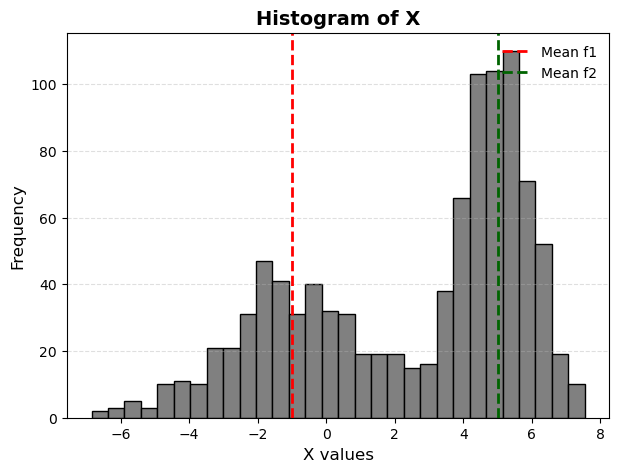

In [5]:
# slide 14 - algorithm 5 code
n = 1000
U = np.random.rand(n)
X = np.where(
    U < 0.4,
    np.random.normal(loc=-1, scale=2, size=n),
    np.random.normal(loc=5, scale=1, size=n)
)

# plot
plt.figure(figsize=(7, 5))
plt.hist(X, bins=30, color='grey', edgecolor='black')
plt.xlabel("X values", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram of X", fontsize=14, fontweight='bold')
plt.axvline(-1, color='red', linewidth=2, linestyle='--', label='Mean f1')
plt.axvline(5, color='darkgreen', linewidth=2, linestyle='--', label='Mean f2')
plt.legend(loc='upper right', frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

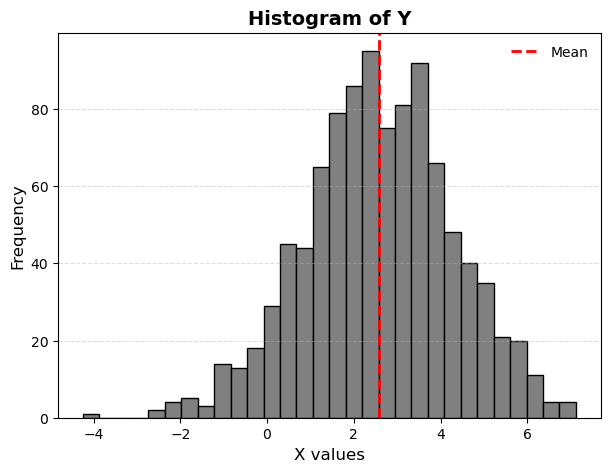

In [6]:
# slide 17 - Weighted sum of random variables
n = 1000
X1 = np.random.normal(loc=-1, scale=4, size=n)
X2 = np.random.normal(loc=5, scale=1, size=n)
Y = 0.4 * X1 + 0.6 * X2

# plot
plt.figure(figsize=(7, 5))
plt.hist(Y, bins=30, color='grey', edgecolor='black')
plt.xlabel("X values", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram of Y", fontsize=14, fontweight='bold')
plt.axvline(np.mean(Y), color='red', linewidth=2, linestyle='--', label='Mean')
plt.legend(loc='upper right', frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

### Part 2

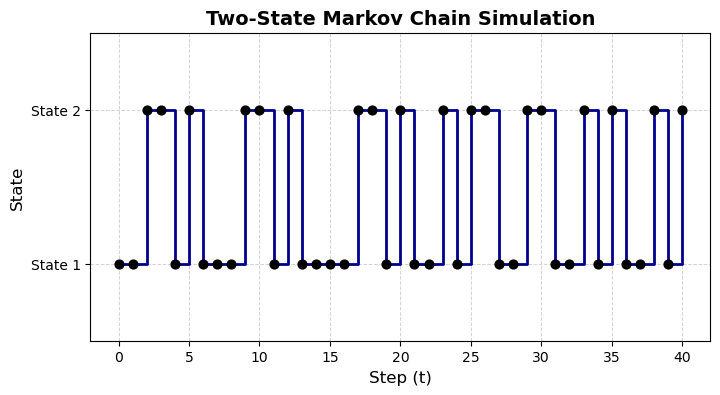

In [7]:
# slide 24
n = 40
P = np.array([[0.5, 0.5],
              [0.6, 0.4]])
X = np.zeros(n+1, dtype=int)
U = np.random.rand()
U1 = np.random.rand(n)
X[0] = 1 if U < 0.3 else 2

for i in range(n):
    if U1[i] < P[X[i]-1, 0]:  # P[state, 0] is probability of going to 1
        X[i+1] = 1
    else:
        X[i+1] = 2

# plot
A = np.arange(n+1)
plt.figure(figsize=(8, 4))
plt.step(A, X, where='post', color='darkblue', linewidth=2)
plt.scatter(A, X, color='black', s=40, zorder=3)
plt.xlabel("Step (t)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.title("Two-State Markov Chain Simulation", fontsize=14, fontweight='bold')
plt.xticks(np.arange(0, n+1, 5))
plt.yticks([1, 2], ["State 1", "State 2"])
plt.ylim(0.5, 2.5)
plt.grid(color='lightgrey', linestyle='--', linewidth=0.7)
plt.show()

### Part 3

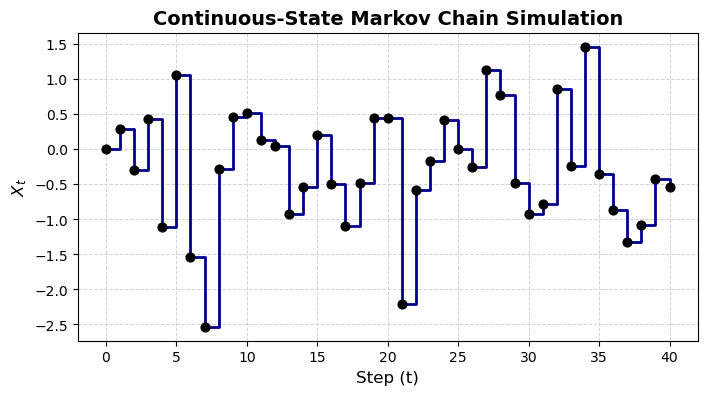

In [8]:
# slide 3 - generation of markov chain paths (continuous stat space)
n = 40
X = np.zeros(n+1)
for i in range(n):
    X[i+1] = np.random.normal(loc=X[i]/2, scale=1)

# plot
A = np.arange(n+1)
plt.figure(figsize=(8, 4))
plt.step(A, X, where='post', color='darkblue', linewidth=2)
plt.scatter(A, X, color='black', s=40, zorder=3)
plt.xlabel("Step (t)", fontsize=12)
plt.ylabel("$X_t$", fontsize=12)
plt.title("Continuous-State Markov Chain Simulation", fontsize=14, fontweight='bold')
plt.grid(color='lightgrey', linestyle='--', linewidth=0.7)
plt.show()

### Part 4

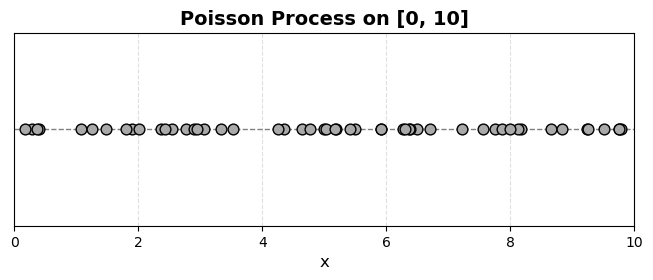

In [9]:
# slide 7 algorithm
N = np.random.poisson(lam=50)
X = np.random.uniform(low=0, high=10, size=N)
Y = np.zeros(N)

# plot
plt.figure(figsize=(8, 2.5))
plt.scatter(X, Y, s=60, c='darkgrey', edgecolors='black', zorder=3)
plt.hlines(0, xmin=0, xmax=10, color='gray', linestyles='dashed', linewidth=1)
plt.xlim(0, 10)
plt.ylim(-0.5, 0.5)
plt.xlabel("x", fontsize=12)
plt.ylabel("")
plt.title("Poisson Process on [0, 10]", fontsize=14, fontweight='bold')
plt.yticks([])  # Hide y-axis ticks
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()

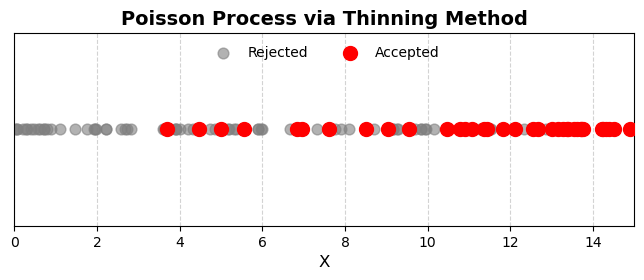

In [10]:
# slide 11 example
lam_tilde = 7.05
a, b = 0, 15
Lambda_tilde = lam_tilde * (b - a)
N = np.random.poisson(Lambda_tilde)
X = np.random.uniform(low=0, high=b, size=N)

# Thinning
R = X/50 + 3*X**2/100
U = np.random.uniform(size=N)
Y = X[R > lam_tilde * U]

# rejected points
reject = ~np.isin(X, Y)

# plot
plt.figure(figsize=(8, 2.5))
plt.scatter(X[reject], np.zeros(sum(reject)), color='grey', alpha=0.6, s=60, label='Rejected', zorder=2)
plt.scatter(Y, np.zeros(len(Y)), color='red', s=100, label='Accepted', zorder=3)
plt.xlim(a, b)
plt.ylim(-0.5, 0.5)
plt.xlabel("X", fontsize=12)
plt.ylabel("")
plt.title("Poisson Process via Thinning Method", fontsize=14, fontweight='bold')
plt.yticks([])
plt.grid(axis='x', linestyle='--', color='lightgrey')
plt.legend(loc='upper center', ncol=2, frameon=False)
plt.show()


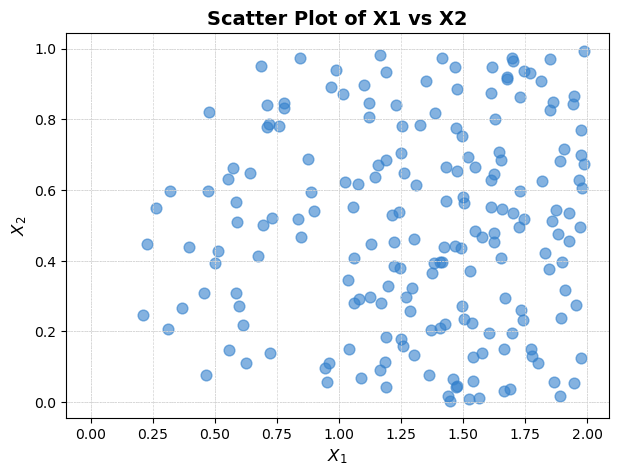

In [11]:
# slide 13 example
N = np.random.poisson(200)
U1 = np.random.uniform(0, 1, N)
X1 = np.sqrt(4 * U1)
X2 = np.random.uniform(0, 1, N)

# plot
plt.figure(figsize=(7, 5))
plt.scatter(X1, X2, s=60, color=(0.2, 0.5, 0.8, 0.6))
plt.xlabel("$X_1$", fontsize=12)
plt.ylabel("$X_2$", fontsize=12)
plt.title("Scatter Plot of X1 vs X2", fontsize=14, fontweight='bold')
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
for h in np.arange(0, 1.01, 0.2):
    plt.axhline(h, color='lightgrey', linestyle=':', linewidth=0.7)
for v in np.arange(0, 2.01, 0.5):
    plt.axvline(v, color='lightgrey', linestyle=':', linewidth=0.7)
plt.show()